In [2]:
import pandas as pd
import seaborn as sns
import pandasql as psql
import numpy as np
import matplotlib.pyplot as plt
from dython.nominal import identify_nominal_columns
from scipy import stats
from scipy.stats import chisquare
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
import mca
import prince

In [10]:
survey = pd.read_csv('original_data/survey.csv')

C:\Users\Eren\AppData\Local\Temp/ipykernel_24544/1872705409.py:1: DtypeWarning: Columns (314,391,392,789,791,792,1124,1125,1227,1228,1231,1232,1477,1478,1554,1555,1556,1557,1558,1559,1561,1568,1571,1678,1687,1745,1746,1818,1836,1837,1843,1844,1849,1851,1852,1853,2072,2116,2117,2264,2266,2280,2281,2282,2283,2289,2290,2483,2484,2501,2502,2508,2509,2699,2711,2712,2830) have mixed types. Specify dtype option on import or set low_memory=False.
  survey = pd.read_csv('original_data/survey.csv')


In [9]:
# survey.drop(['yrmomborn_1'], axis=1, inplace=True)
# survey.drop(['SRQE_RAI_1'], axis=1, inplace=True)
# survey.drop(['selsa_rom_1'], axis=1, inplace=True)
# survey.drop(['selsa_fam_1'], axis=1, inplace=True)
# survey.drop(['selsa_soc_1'], axis=1, inplace=True)

,egoid,Tier,StudyStatus,RegionUS,US,StartDate_1,EndDate_1,gender_1,hs_1,hssex_1,...,gpa_fa2017,gpa_fa2018,gpa_sp2019,gpa_su2019,reshallyear1,reshallyear2,liveoffcampusyear3,reshallyear3,liveoffcampusyear4,reshallyear4
0,44869,Tier 1,In Study,South Atlantic,US address,05aug2015 17:25:30,05aug2015 19:09:07,Female,Public school,A mixture of boys and girls,...,3.513,NaN,NaN,NaN,299.0,299.0,On Campus,299.0,NaN,NaN
1,43516,Tier 1,In Study,Pacific,US address,10aug2015 18:26:07,10aug2015 19:27:45,Female,Public school,A mixture of boys and girls,...,NaN,NaN,NaN,NaN,283.0,283.0,On Campus,283.0,NaN,NaN
2,89411,Tier 3,In Study,Pacific,US address,NaN,NaN,Female,Private independent college-prep school,A mixture of boys and girls,...,NaN,NaN,NaN,NaN,287.0,287.0,NaN,NaN,NaN,NaN
3,74285,Tier 3,In Study,West South Central,US address,NaN,NaN,Female,Public school,A mixture of boys and girls,...,NaN,NaN,NaN,NaN,279.0,279.0,NaN,NaN,NaN,NaN
4,56527,Tier 3,In Study,Pacific,US address,NaN,NaN,Male,Private religious/parochial school,A mixture of boys and girls,...,NaN,NaN,NaN,NaN,105.0,105.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,48826,Tier 3,In Study,Pacific,US address,NaN,NaN,Male,Public school,A mixture of boys and girls,...,NaN,NaN,NaN,NaN,139.0,NaN,Off Campus,NaN,NaN,NaN
718,11454,Tier 3,In Study,Mountain,US address,NaN,NaN,Male,Public school,A mixture of boys and girls,...,NaN,NaN,NaN,NaN,168.0,NaN,NaN,NaN,NaN,NaN
719,93246,Tier 1,In Study,East North Central,US address,16aug2015 16:41:29,16aug2015 17:21:37,Male,Private religious/parochial school,Same sex- male,...,NaN,NaN,NaN,NaN,168.0,NaN,NaN,NaN,NaN,NaN
720,75341,Tier 2,In Study,NaN,Not US address,31oct2015 23:27:16,01nov2015 00:15:35,Female,Private religious/parochial school,Same sex- female,...,NaN,NaN,NaN,NaN,236.0,NaN,NaN,NaN,NaN,NaN


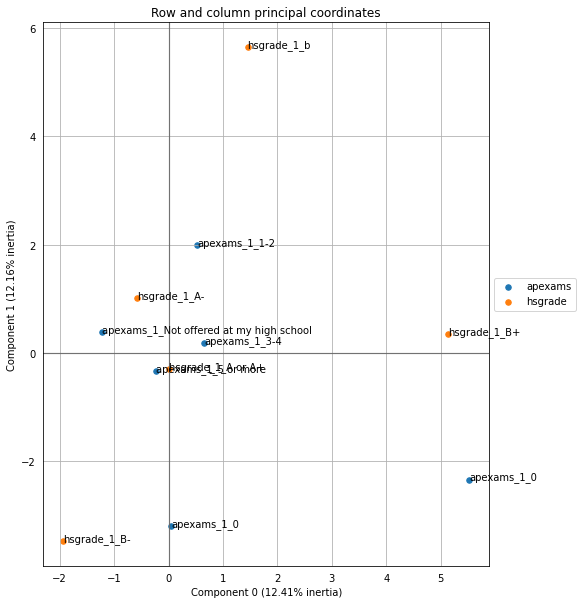

In [40]:
survey_temp = survey
survey_temp.replace([np.inf, -np.inf], np.nan, inplace=True)
survey_temp = survey_temp.fillna(0)
columns = survey_temp.columns

# for col in columns:
#     erase = False
#     for val in survey_temp[col].values:
#         try:
#             if val < 0:
#                 erase = True
#                 break
#         except:
#             pass
    
#     if erase:
#         survey_temp.drop(col, axis=1, inplace=True)

survey_temp = survey_temp[['apexams_1', 'hsgrade_1']]

prince_mca = prince.MCA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)
survey_mca = prince_mca.fit(survey_temp)

ax = survey_mca.plot_coordinates(
    X=survey_temp,
    ax=None,
    figsize=(8, 10),
    show_row_points=False,
    row_points_size=0,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=True,
    legend_n_cols=1
).legend(loc='center left', bbox_to_anchor=(1, 0.5))

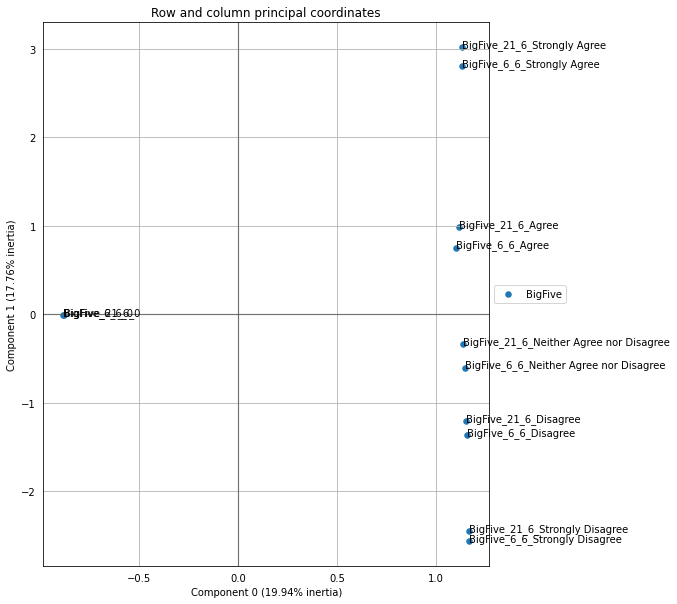

In [12]:
survey_temp = pd.read_csv('original_data/survey_partial/survey_bigfive.csv')
survey_temp.replace([np.inf, -np.inf], np.nan, inplace=True)
survey_temp = survey_temp.fillna(0)
columns = survey_temp.columns

survey_temp = survey_temp[['BigFive_21_6', 'BigFive_6_6']]

prince_mca = prince.MCA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)
survey_mca = prince_mca.fit(survey_temp)

ax = survey_mca.plot_coordinates(
    X=survey_temp,
    ax=None,
    figsize=(8, 10),
    show_row_points=False,
    row_points_size=0,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=True,
    legend_n_cols=1
).legend(loc='center left', bbox_to_anchor=(1, 0.5))

ZeroDivisionError: float division by zero

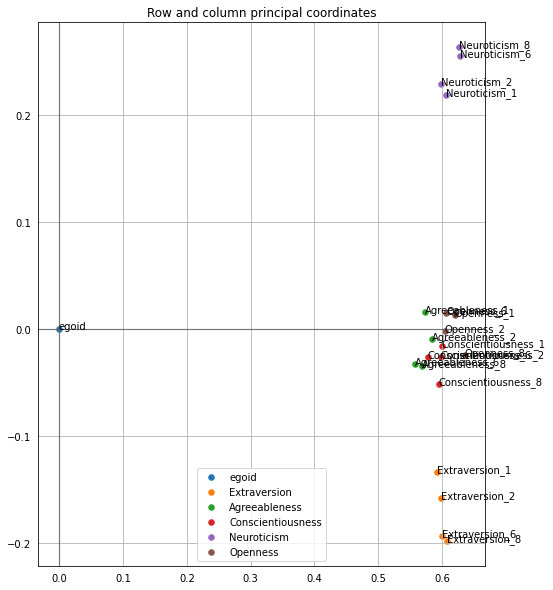

In [14]:
survey_temp = pd.read_csv('original_data/survey_partial/survey_personality_inv.csv')
survey_temp.replace([np.inf, -np.inf], np.nan, inplace=True)
# survey_temp = survey_temp.fillna(0)
survey_temp = survey_temp.dropna()
columns = survey_temp.columns

# survey_temp = survey_temp[['BigFive_21_6', 'BigFive_6_6']]

prince_mca = prince.MCA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)
survey_mca = prince_mca.fit(survey_temp)

ax = survey_mca.plot_coordinates(
    X=survey_temp,
    ax=None,
    figsize=(8, 10),
    show_row_points=False,
    row_points_size=0,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=True,
    legend_n_cols=1
).legend(loc='center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot:>

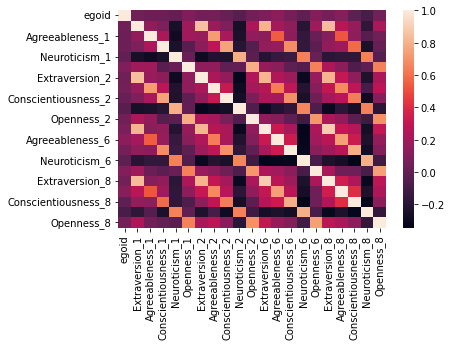

In [5]:
survey = pd.read_csv('original_data/survey_partial/survey_personality_inv.csv')

sns.heatmap(survey.corr())

In [9]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = []
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.append((cols[i], cols[j], df.iat[i, j]))
    return pairs_to_drop

def get_top_abs_correlations(df):
    abs_corr = df.corr().abs()
    # au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(abs_corr)
    return sorted(labels_to_drop, key=lambda tup: tup[2], reverse=True)
    # au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    # return au_corr[0:n]

<AxesSubplot:>

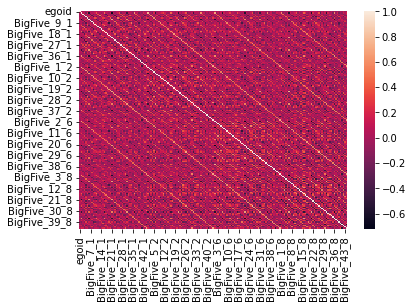

In [11]:
survey = pd.read_csv('original_data/survey_partial/survey_bigfive.csv')

dc = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neither Agree nor Disagree': 3,
    'Agree': 4,
    'Strongly Agree': 5
}

for col in survey.columns:
    if col == 'egoid':
        continue

    survey[col] = survey[col].map(dc, na_action='ignore')

# survey = survey.applymap(lambda x: dc[x])

sns.heatmap(survey.corr())

In [14]:

[
('BigFive_21_8', 'BigFive_6_8', 0.8032040503288689),
 ('BigFive_26_8', 'BigFive_26_6', 0.7721362541795055), ## Has an assertive personality 
 ('BigFive_21_6', 'BigFive_6_6', 0.7675524102018624),
 ('BigFive_1_8', 'BigFive_1_6', 0.7482583493450835), ## Is talkative
 ('BigFive_1_2', 'BigFive_1_1', 0.7455669253608073), ## Is talkative
 ('BigFive_21_2', 'BigFive_6_2', 0.7415674839017544),
 ('BigFive_36_8', 'BigFive_36_6', 0.7401616955904328), ## Is outgoing
 ('BigFive_6_8', 'BigFive_21_2', 0.7333342234992506),
 ('BigFive_21_1', 'BigFive_6_1', 0.7302418438676039),
 ('BigFive_21_8', 'BigFive_21_6', 0.7238319329289684),
 ('BigFive_21_8', 'BigFive_1_8', 0.7188291332411088),
 ('BigFive_36_6', 'BigFive_1_6', 0.7152920967314854),
 ('BigFive_44_8', 'BigFive_44_6', 0.7137557802781624),
 ('BigFive_44_2', 'BigFive_44_1', 0.7106508304342439),
 ('BigFive_6_8', 'BigFive_6_6', 0.7066783454410426),
 ('BigFive_31_8', 'BigFive_21_8', 0.7008223005089118),
]

ans = get_top_abs_correlations(survey)
ans

[('egoid', 'egoid', 1.0),
 ('BigFive_1_1', 'BigFive_1_1', 1.0),
 ('BigFive_2_1', 'BigFive_2_1', 1.0),
 ('BigFive_3_1', 'BigFive_3_1', 1.0),
 ('BigFive_4_1', 'BigFive_4_1', 1.0),
 ('BigFive_5_1', 'BigFive_5_1', 1.0),
 ('BigFive_6_1', 'BigFive_6_1', 1.0),
 ('BigFive_7_1', 'BigFive_7_1', 1.0),
 ('BigFive_8_1', 'BigFive_8_1', 1.0),
 ('BigFive_9_1', 'BigFive_9_1', 1.0),
 ('BigFive_10_1', 'BigFive_10_1', 1.0),
 ('BigFive_11_1', 'BigFive_11_1', 1.0),
 ('BigFive_12_1', 'BigFive_12_1', 1.0),
 ('BigFive_13_1', 'BigFive_13_1', 1.0),
 ('BigFive_14_1', 'BigFive_14_1', 1.0),
 ('BigFive_15_1', 'BigFive_15_1', 1.0),
 ('BigFive_16_1', 'BigFive_16_1', 1.0),
 ('BigFive_17_1', 'BigFive_17_1', 1.0),
 ('BigFive_18_1', 'BigFive_18_1', 1.0),
 ('BigFive_19_1', 'BigFive_19_1', 1.0),
 ('BigFive_20_1', 'BigFive_20_1', 1.0),
 ('BigFive_21_1', 'BigFive_21_1', 1.0),
 ('BigFive_22_1', 'BigFive_22_1', 1.0),
 ('BigFive_23_1', 'BigFive_23_1', 1.0),
 ('BigFive_24_1', 'BigFive_24_1', 1.0),
 ('BigFive_25_1', 'BigFive_25_1'

<AxesSubplot:>

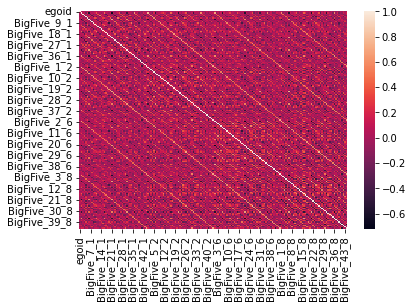

In [15]:
survey = pd.read_csv('original_data/survey_partial/survey_bigfive.csv')
survey = survey.fillna(0)
# survey = survey.dropna()

dc = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neither Agree nor Disagree': 3,
    'Agree': 4,
    'Strongly Agree': 5
}

for col in survey.columns:
    if col == 'egoid':
        continue

    survey[col] = survey[col].map(dc, na_action='ignore')

# survey = survey.applymap(lambda x: dc[x])

sns.heatmap(survey.corr())

In [16]:
[
('BigFive_21_8', 'BigFive_6_8', 0.8032040503288689),
('BigFive_26_8', 'BigFive_26_6', 0.7721362541795055),
('BigFive_21_6', 'BigFive_6_6', 0.7675524102018624),
('BigFive_1_8', 'BigFive_1_6', 0.7482583493450835),
('BigFive_1_2', 'BigFive_1_1', 0.7455669253608073),
('BigFive_21_2', 'BigFive_6_2', 0.7415674839017544),
('BigFive_36_8', 'BigFive_36_6', 0.7401616955904328),
('BigFive_6_8', 'BigFive_21_2', 0.7333342234992506),
('BigFive_21_1', 'BigFive_6_1', 0.7302418438676039),
('BigFive_21_8', 'BigFive_21_6', 0.7238319329289684),
('BigFive_21_8', 'BigFive_1_8', 0.7188291332411088),
('BigFive_36_6', 'BigFive_1_6', 0.7152920967314854),
('BigFive_44_8', 'BigFive_44_6', 0.7137557802781624),
('BigFive_44_2', 'BigFive_44_1', 0.7106508304342439),
('BigFive_6_8', 'BigFive_6_6', 0.7066783454410426),
('BigFive_31_8', 'BigFive_21_8', 0.7008223005089118),
]

ans = get_top_abs_correlations(survey)
ans

[('egoid', 'egoid', 1.0),
 ('BigFive_1_1', 'BigFive_1_1', 1.0),
 ('BigFive_2_1', 'BigFive_2_1', 1.0),
 ('BigFive_3_1', 'BigFive_3_1', 1.0),
 ('BigFive_4_1', 'BigFive_4_1', 1.0),
 ('BigFive_5_1', 'BigFive_5_1', 1.0),
 ('BigFive_6_1', 'BigFive_6_1', 1.0),
 ('BigFive_7_1', 'BigFive_7_1', 1.0),
 ('BigFive_8_1', 'BigFive_8_1', 1.0),
 ('BigFive_9_1', 'BigFive_9_1', 1.0),
 ('BigFive_10_1', 'BigFive_10_1', 1.0),
 ('BigFive_11_1', 'BigFive_11_1', 1.0),
 ('BigFive_12_1', 'BigFive_12_1', 1.0),
 ('BigFive_13_1', 'BigFive_13_1', 1.0),
 ('BigFive_14_1', 'BigFive_14_1', 1.0),
 ('BigFive_15_1', 'BigFive_15_1', 1.0),
 ('BigFive_16_1', 'BigFive_16_1', 1.0),
 ('BigFive_17_1', 'BigFive_17_1', 1.0),
 ('BigFive_18_1', 'BigFive_18_1', 1.0),
 ('BigFive_19_1', 'BigFive_19_1', 1.0),
 ('BigFive_20_1', 'BigFive_20_1', 1.0),
 ('BigFive_21_1', 'BigFive_21_1', 1.0),
 ('BigFive_22_1', 'BigFive_22_1', 1.0),
 ('BigFive_23_1', 'BigFive_23_1', 1.0),
 ('BigFive_24_1', 'BigFive_24_1', 1.0),
 ('BigFive_25_1', 'BigFive_25_1'

<AxesSubplot:>

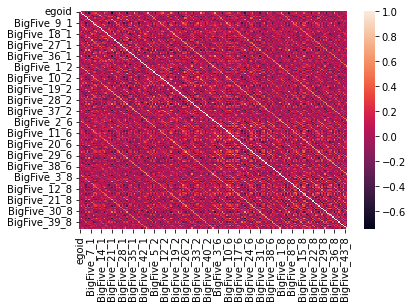

In [17]:
survey = pd.read_csv('original_data/survey_partial/survey_bigfive.csv')
# survey = survey.fillna(0)
survey = survey.dropna()

dc = {
    'Strongly Disagree': 1,
    'Disagree': 2,
    'Neither Agree nor Disagree': 3,
    'Agree': 4,
    'Strongly Agree': 5
}

for col in survey.columns:
    if col == 'egoid':
        continue

    survey[col] = survey[col].map(dc, na_action='ignore')

# survey = survey.applymap(lambda x: dc[x])

sns.heatmap(survey.corr())

In [18]:
[
('BigFive_21_8', 'BigFive_6_8', 0.8021079632234306),
 ('BigFive_26_8', 'BigFive_26_6', 0.793112564981086),
 ('BigFive_21_6', 'BigFive_6_6', 0.7860373944225214),
 ('BigFive_1_2', 'BigFive_1_1', 0.7744052875045973),
 ('BigFive_44_8', 'BigFive_44_6', 0.7716796760258043), ## Is sophisticated in art, music, or literature
 ('BigFive_36_8', 'BigFive_36_6', 0.7702946300130344),
 ('BigFive_6_8', 'BigFive_6_6', 0.7693663032257144),
 ('BigFive_1_8', 'BigFive_1_6', 0.7578208334857575),
 ('BigFive_21_2', 'BigFive_6_2', 0.7526415984681395),
 ('BigFive_6_8', 'BigFive_21_2', 0.7425208946107047),
 ('BigFive_21_1', 'BigFive_1_1', 0.7379751910572695),
 ('BigFive_21_8', 'BigFive_21_6', 0.7371269531342102),
 ('BigFive_6_6', 'BigFive_21_2', 0.7364080010191312),
 ('BigFive_4_2', 'BigFive_4_1', 0.7335542851714026),
 ('BigFive_31_8', 'BigFive_31_6', 0.7322863669758706),
 ('BigFive_31_6', 'BigFive_31_1', 0.7301075865184344),
 ('BigFive_26_6', 'BigFive_26_2', 0.7296974464464764),
 ('BigFive_31_8', 'BigFive_21_8', 0.7286330998784308),
 ('BigFive_21_6', 'BigFive_1_6', 0.7276627762931358),
 ('BigFive_31_6', 'BigFive_21_6', 0.7266160431323803),
 ('BigFive_6_6', 'BigFive_6_2', 0.7237385820732104),
 ('BigFive_36_2', 'BigFive_1_2', 0.7221859180498219),
 ('BigFive_44_6', 'BigFive_44_2', 0.7152498707307412),
 ('BigFive_21_1', 'BigFive_6_1', 0.7146413005231278),
 ('BigFive_27_8', 'BigFive_27_6', 0.7111636197081619),
 ('BigFive_31_8', 'BigFive_6_8', 0.7089885343187029),
 ('BigFive_21_8', 'BigFive_1_8', 0.7055705807780451),
 ('BigFive_25_8', 'BigFive_5_8', 0.7040873827551393),
 
]

ans = get_top_abs_correlations(survey)
ans

[('egoid', 'egoid', 1.0),
 ('BigFive_1_1', 'BigFive_1_1', 1.0),
 ('BigFive_2_1', 'BigFive_2_1', 1.0),
 ('BigFive_3_1', 'BigFive_3_1', 1.0),
 ('BigFive_4_1', 'BigFive_4_1', 1.0),
 ('BigFive_5_1', 'BigFive_5_1', 1.0),
 ('BigFive_6_1', 'BigFive_6_1', 1.0),
 ('BigFive_7_1', 'BigFive_7_1', 1.0),
 ('BigFive_8_1', 'BigFive_8_1', 1.0),
 ('BigFive_9_1', 'BigFive_9_1', 1.0),
 ('BigFive_10_1', 'BigFive_10_1', 1.0),
 ('BigFive_11_1', 'BigFive_11_1', 1.0),
 ('BigFive_12_1', 'BigFive_12_1', 1.0),
 ('BigFive_13_1', 'BigFive_13_1', 1.0),
 ('BigFive_14_1', 'BigFive_14_1', 1.0),
 ('BigFive_15_1', 'BigFive_15_1', 1.0),
 ('BigFive_16_1', 'BigFive_16_1', 1.0),
 ('BigFive_17_1', 'BigFive_17_1', 1.0),
 ('BigFive_18_1', 'BigFive_18_1', 1.0),
 ('BigFive_19_1', 'BigFive_19_1', 1.0),
 ('BigFive_20_1', 'BigFive_20_1', 1.0),
 ('BigFive_21_1', 'BigFive_21_1', 1.0),
 ('BigFive_22_1', 'BigFive_22_1', 1.0),
 ('BigFive_23_1', 'BigFive_23_1', 1.0),
 ('BigFive_24_1', 'BigFive_24_1', 1.0),
 ('BigFive_25_1', 'BigFive_25_1'

<AxesSubplot:>

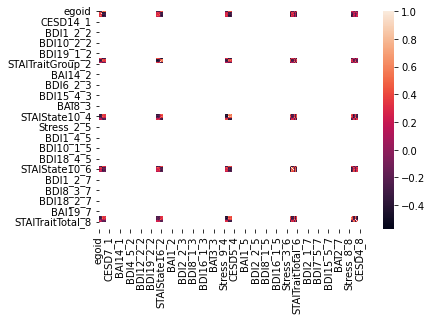

In [6]:
survey = pd.read_csv('original_data/survey_partial/survey_mental_health.csv')

dc = {
    'Almost never': 1,
    'Sometimes': 2,
    'Often': 3,
    'Almost always': 4,
}

for col in survey.columns:
    if col == 'egoid':
        continue

    survey[col] = survey[col].map(dc, na_action='ignore')

sns.heatmap(survey.corr())

In [10]:
[
('STAIState10_1', 'STAIState1_1', 0.6749937706031984),
('STAIState10_1', 'STAIState3_1', 0.6239721575697044),
('STAIState16_1', 'STAIState10_1', 0.6196431123111419),
]
ans = get_top_abs_correlations(survey)
ans

[('egoid', 'egoid', 1.0),
 ('STAIState1_1', 'STAIState1_1', 1.0),
 ('STAIState2_1', 'STAIState2_1', 1.0),
 ('STAIState3_1', 'STAIState3_1', 1.0),
 ('STAIState4_1', 'STAIState4_1', 1.0),
 ('STAIState5_1', 'STAIState5_1', 1.0),
 ('STAIState6_1', 'STAIState6_1', 1.0),
 ('STAIState7_1', 'STAIState7_1', 1.0),
 ('STAIState8_1', 'STAIState8_1', 1.0),
 ('STAIState9_1', 'STAIState9_1', 1.0),
 ('STAIState10_1', 'STAIState10_1', 1.0),
 ('STAIState11_1', 'STAIState11_1', 1.0),
 ('STAIState12_1', 'STAIState12_1', 1.0),
 ('STAIState13_1', 'STAIState13_1', 1.0),
 ('STAIState14_1', 'STAIState14_1', 1.0),
 ('STAIState15_1', 'STAIState15_1', 1.0),
 ('STAIState16_1', 'STAIState16_1', 1.0),
 ('STAIState17_1', 'STAIState17_1', 1.0),
 ('STAIState18_1', 'STAIState18_1', 1.0),
 ('STAIState19_1', 'STAIState19_1', 1.0),
 ('STAIState20_1', 'STAIState20_1', 1.0),
 ('STAIState20_2', 'STAIState20_2', 1.0),
 ('STAIState10_1', 'STAIState1_1', 0.6749937706031984),
 ('STAIState10_1', 'STAIState3_1', 0.6239721575697044)

<AxesSubplot:>

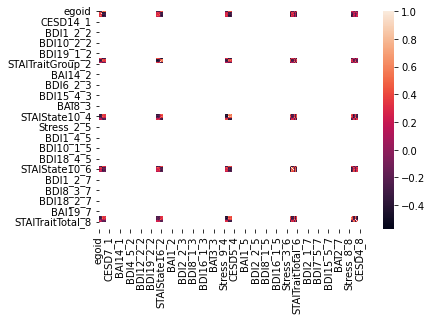

In [7]:
survey = pd.read_csv('original_data/survey_partial/survey_mental_health.csv')
survey = survey.fillna(0)

dc = {
    'Almost never': 1,
    'Sometimes': 2,
    'Often': 3,
    'Almost always': 4,
}

for col in survey.columns:
    if col == 'egoid':
        continue

    survey[col] = survey[col].map(dc, na_action='ignore')

sns.heatmap(survey.corr())